In [1]:
import numpy as np
import astropy.units as u
from astropy.io import fits
import time 
from importlib import reload
import copy
from datetime import datetime
today = int(datetime.today().strftime('%Y%m%d'))

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle, Rectangle

import poppy

from adefc_vortex.math_module import xp, xcipy, ensure_np_array
from adefc_vortex import utils
from adefc_vortex.imshows import imshow1, imshow2, imshow3, plot_data
from adefc_vortex import dm
from adefc_vortex import props
from adefc_vortex import aefc_1dm as adefc
import adefc_vortex.pwp as pwp
import adefc_vortex.scoob_model as scoobm

wavelength_c = 633e-9
npix = 1000


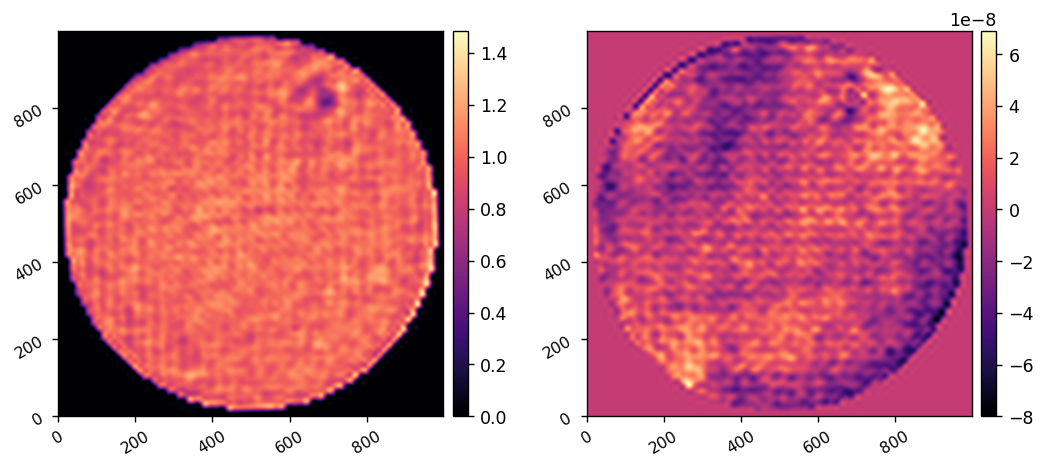

In [2]:
wfe_amp = xp.array(fits.getdata('data/pr_est_amp.fits'))
wfe_opd = xp.array(fits.getdata('data/pr_est_opd.fits'))
WFE = wfe_amp * xp.exp(1j* 2*np.pi/wavelength_c * wfe_opd)
imshow2(wfe_amp, wfe_opd)

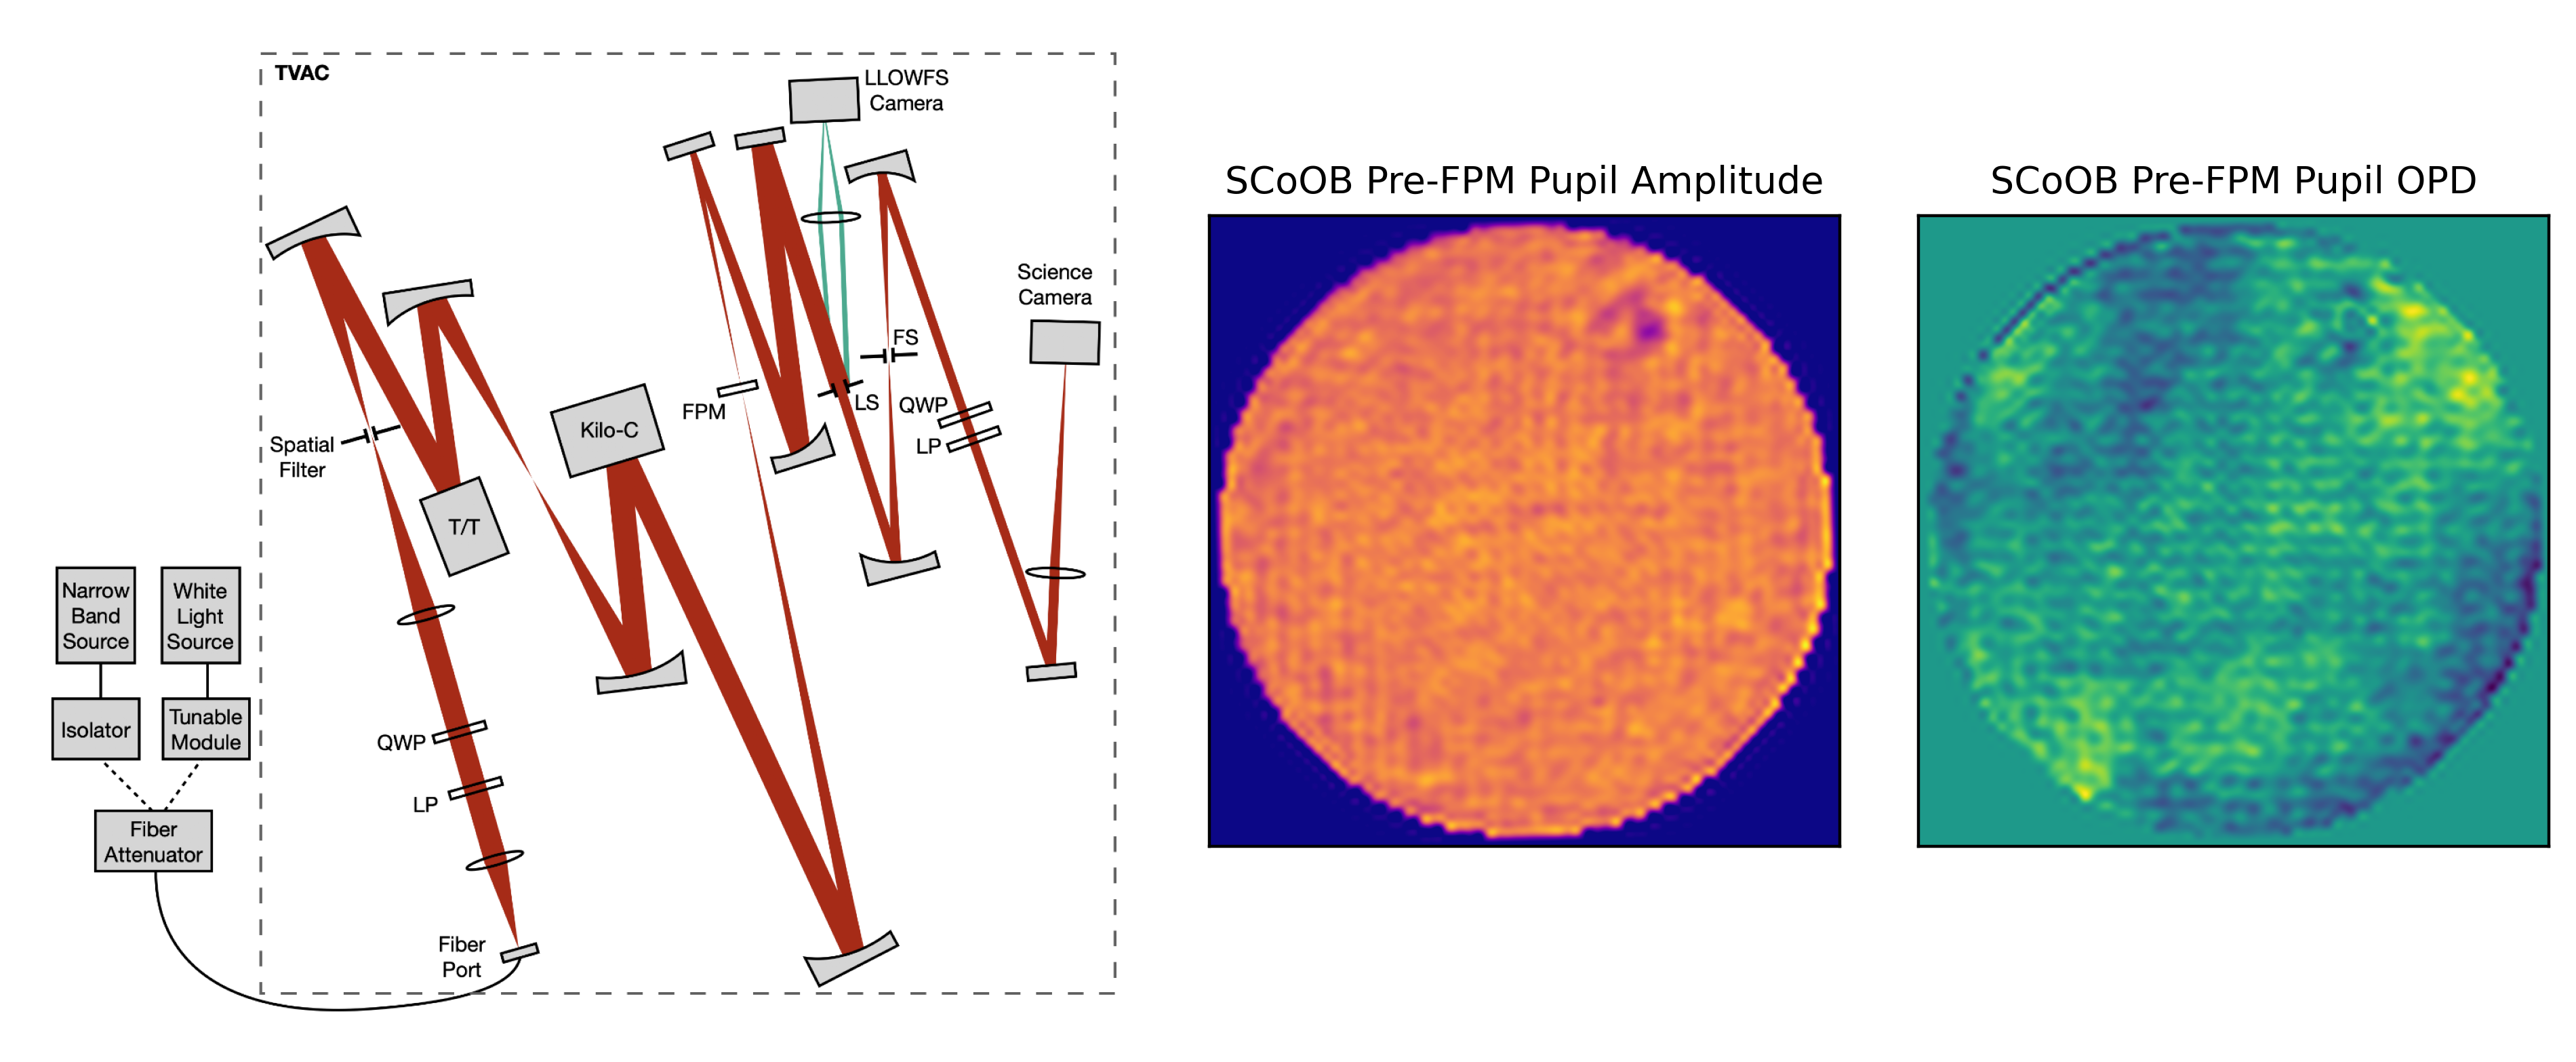

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['image.origin']='lower'
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm, Normalize
from matplotlib.gridspec import GridSpec
# Read the image
img = np.flipud(mpimg.imread('scoob_diagram.png'))

# Display the image
fig, ax = plt.subplots(nrows=1, ncols=3, dpi=400, figsize=(12,6), gridspec_kw={'width_ratios': [1.75, 1, 1], })
ax[0].imshow(img)
ax[0].axis('off')  # Turn off axis labels and ticks

tfs = 10

ax[1].imshow( ensure_np_array(wfe_amp), cmap='plasma')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('SCoOB Pre-FPM Pupil Amplitude', fontsize=tfs)

ax[2].imshow( ensure_np_array(wfe_opd), cmap='viridis')
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title('SCoOB Pre-FPM Pupil OPD', fontsize=tfs)

plt.subplots_adjust(wspace=0.1)

# fig.savefig('../figs/scoob_diagram_and_pr.pdf', format='pdf', bbox_inches="tight")